/tmp/ipykernel_25698/1388258187.py:11: UserWarning: Relative humidity >120%, ensure proper units.
  dewpoint = mpcalc.dewpoint_from_relative_humidity(temperature, relative_humidity)


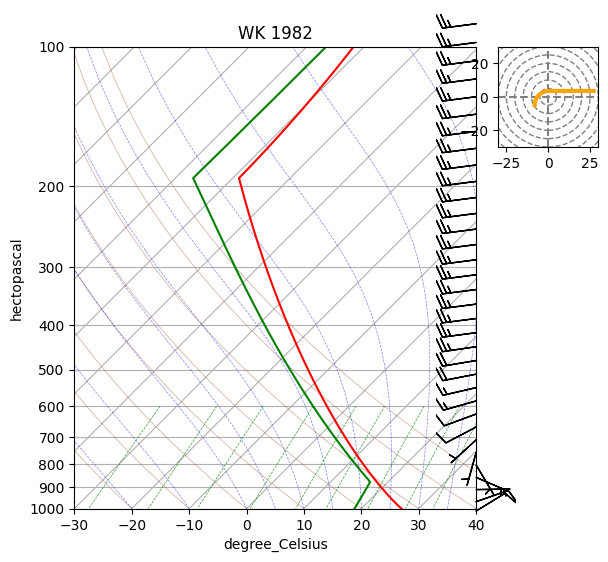

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import metpy.calc as mpcalc
from metpy.units import units
df = pd.read_csv('input_sounding', skiprows=1, header=None, names= ["height", "theta", "q", "uwnd", "vwnd"], delimiter='\s+')
height = df.height.values * units.meters
pressure = mpcalc.height_to_pressure_std(height)
temperature = mpcalc.temperature_from_potential_temperature(pressure, df.theta.values * units.kelvin)
relative_humidity = mpcalc.relative_humidity_from_mixing_ratio(pressure, temperature, df.q.values * units('g/kg'))
dewpoint = mpcalc.dewpoint_from_relative_humidity(temperature, relative_humidity)
u = df.uwnd * units('m/s')
v = df.vwnd * units('m/s')
from metpy.plots import Hodograph, SkewT

fig = plt.figure(figsize=(9, 6))
# Grid for plots
gs = gridspec.GridSpec(4, 4)
skew = SkewT(fig, rotation=45, subplot=gs[0:, 0:])

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot_barbs(pressure[::5], u[::5] , v[::5])
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats(colors='sienna', linestyles='-', linewidths=0.5)
skew.plot_moist_adiabats(colors='blue', linestyles='--', linewidths=0.5)
skew.plot_mixing_lines(colors='green', linestyles='--', linewidths=0.5)

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)
plt.title('WK 1982')
# Create a hodograph
ax = fig.add_subplot(gs[0, 3:])
h = Hodograph(ax, component_range=30.)
h.add_grid(increment=5)
h.plot(u, v, color='orange')
# Show the plot
plt.show()